In [1]:
P.<X> = RDF[]

In [32]:
def calcCoeffs(n):
    L = P(legendre_P(n, X))
    dL = L.diff()

    x = list(zip(*L.roots())[0])
    w = [2/((1-v^2)*dL(v)^2) for v in x]
    p = [[RDF(legendre_P(m, v)) for v in x] for m in range(n)]

    return "{{\n{},\narray2d<double>({}, {}, new double[{}]{{\n{}\n}}),\nnew double[{}]{{{}}},\nnew double[{}]{{{}}}\n}}".format(
        n,
        n,n,n*n, ",\n".join([",".join(map(str, r)) for r in p]),
        n, ",".join(map(str, x)),
        n, ",".join(map(str, w))
    )
calcCoeffs(3)

'{\n3,\narray2d<double>(3, 3, new double[9]{\n1.0,1.0,1.0,\n-0.7745966692414834,0.0,0.7745966692414833,\n0.4000000000000001,0.5,0.3999999999999998\n}),\nnew double[3]{-0.7745966692414834,0.0,0.7745966692414833},\nnew double[3]{0.5555555555555554,0.8888888888888888,0.5555555555555557}\n}'

In [252]:
data = "static LegendreData legendreData[] = {\n" + ",\n".join(["{\n0,\narray2d<double>(0,0,new double[0]),\nnew double[0],\nnew double[0]\n}" if n == 0 else calcCoeffs(2*n) for n in range(9)]) + "\n};"
print data

static LegendreData legendreData[] = {
{
0,
array2d<double>(0,0,new double[0]),
new double[0],
new double[0]
},
{
2,
array2d<double>(2, 2, new double[4]{
1.0,1.0,
-0.5773502691896257,0.5773502691896256
}),
new double[2]{-0.5773502691896258,0.5773502691896256},
new double[2]{0.9999999999999998,1.0000000000000004}
},
{
4,
array2d<double>(4, 4, new double[16]{
1.0,1.0,1.0,1.0,
-0.8611363115940536,-0.3399810435848565,0.33998104358485626,0.8611363115940531,
0.6123336207187163,-0.32661933500442786,-0.3266193350044281,0.6123336207187152,
-0.30474698495521024,0.4117279996728997,-0.4117279996728996,0.3047469849552084
}),
new double[4]{-0.8611363115940536,-0.33998104358485653,0.3399810435848563,0.8611363115940531},
new double[4]{0.3478548451374517,0.6521451548625459,0.6521451548625463,0.3478548451374526}
},
{
6,
array2d<double>(6, 6, new double[36]{
1.0,1.0,1.0,1.0,1.0,1.0,
-0.9324695142031534,-0.6612093864662638,-0.23861918608319677,0.23861918608319688,0.6612093864662635,0.9324695142031517,
0.8

In [253]:
import os
os.system("echo -n '%s' | xclip -i" % data) # middle mouse button

0

In [133]:
def coeffs(n):
    L = P(legendre_P(n, X))
    dL = L.diff()

    x = list(zip(*L.roots())[0])
    w = [2/((1-v^2)*dL(v)^2) for v in x]
    p = [[RDF(legendre_P(m, v)) for v in x] for m in range(n)]
    return x, w, p

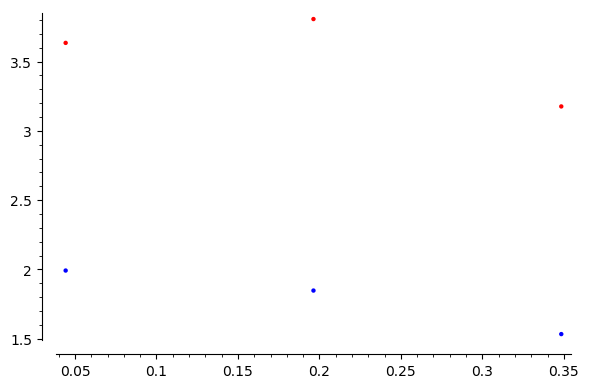

In [245]:
a = 0
b = 0.39269908169872414
f = lambda x: 2.*cos(2.*x)

def q(f, w, p):
    m = (a + b) / 2;
    h = (b - a) / 2;
    
    n = len(w)
    coeffs = [0]*n;
    H = 1;
    for i in range(n):
        for j in range(n):
            coeffs[i] += f[j] * w[j] * p[i][j] * (i + .5) / H;
        H *= h * 2;

    return coeffs;

shift = lambda x: (a+b)/2 + x*(b-a)/2
mapf = lambda f, a: [(x, f(x)) for x in a]

x13, w13, p13 = coeffs(3)
x14, w14, p14 = coeffs(2)
(
    list_plot(mapf(f, map(shift, x13)))
    # + list_plot(mapf(f, map(shift, x14)), color="green")
    + list_plot(zip(map(shift, x13), vector([v*((b-a))^i for i, v in enumerate(q(map(f, map(shift, x13)), w13, p13))])*matrix(p13)), color="red")
).show()

In [230]:
x, w, p = coeffs(13)
[legendre_P(13, v) for v in x]

[-4.575322095835174e-13,
 -1.228237085307315e-13,
 1.6292844578597925e-15,
 3.934688387853687e-14,
 1.9020967050081914e-14,
 1.9730867760984266e-15,
 0,
 -1.9730867760984266e-15,
 -1.7479579300692713e-14,
 -4.3229861741099097e-14,
 -4.884308553129157e-14,
 5.124880629023772e-14,
 2.328847582471152e-13]

In [231]:
p

[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [-0.9841830547185997,
  -0.9175983992229675,
  -0.8015780907333097,
  -0.6423493394403492,
  -0.4484927510364414,
  -0.23045831595513544,
  0.0,
  0.23045831595513544,
  0.4484927510364418,
  0.6423493394403501,
  0.8015780907333022,
  0.9175983992229736,
  0.984183054718594],
 [0.9529244277928512,
  0.7629802333848287,
  0.46379115331548704,
  0.11891901081917948,
  -0.19828137840164692,
  -0.42033344691068447,
  0.5,
  -0.42033344691068447,
  -0.19828137840164634,
  0.11891901081918119,
  0.4637911533154691,
  0.7629802333848454,
  0.9529244277928346],
 [-0.9069647539561703,
  -0.5551168018391631,
  -0.08522265146717319,
  0.3009203128825667,
  0.44720810215538137,
  0.3150877744945131,
  0.0,
  -0.3150877744945131,
  -0.4472081021553813,
  -0.30092031288256527,
  0.0852226514671485,
  0.5551168018391925,
  0.9069647539561376],
 [0.8473905277790634,
  0.31916983027280993,
  -0.22829629704861304,
  -0.427457195471909

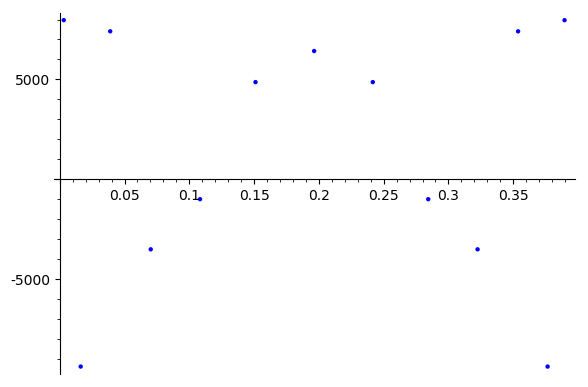

In [155]:
x, w, p = coeffs(13)
list_plot(zip(map(shift, x), vector(q(map(f, map(shift, x)), w, p))*matrix(p)))

In [152]:
x, w, p = coeffs(8)
q(map(f, map(shift, x)), w, p)

[1.80063263231421,
 -0.753628766046121,
 -0.609164214665484,
 0.0505888415943199,
 0.0174747166073033,
 -0.000805120564116635,
 -0.000176842881131734,
 5.64112268364170e-6]

In [153]:
map(f, map(shift, x))

[1.99975682782262,
 1.99362754204591,
 1.96538406325860,
 1.89805237950084,
 1.78788190017646,
 1.65171491304651,
 1.52251097517948,
 1.43609415975293]